<a href="https://colab.research.google.com/github/jhasubu091/Crop-Yeild-Prediction/blob/main/crop_yeild_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel("/content/crop yield data sheet.xlsx")
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [53]:
#Checking the shape of the dataset
df.shape

(109, 7)

In [54]:
#Checking the data types of the columns
df.dtypes

Rain Fall (mm)    float64
Fertilizer        float64
Temperatue         object
Nitrogen (N)      float64
Phosphorus (P)    float64
Potassium (K)     float64
Yeild (Q/acre)    float64
dtype: object

In [55]:
df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [56]:
#Dropping ":" from the Temperature column
df = df[df['Temperatue'] != ':']

In [57]:
#converting the Temperatue column to float
df['Temperatue'] = df['Temperatue'].astype(float)

In [58]:
#Checking for null values
df.isnull().sum()

Rain Fall (mm)    9
Fertilizer        9
Temperatue        9
Nitrogen (N)      9
Phosphorus (P)    9
Potassium (K)     9
Yeild (Q/acre)    9
dtype: int64

In [59]:
#replacing missing values with median
columns = [df.columns]
for col in columns:
    df[col] = df[col].fillna(df[col].median())

In [60]:
df.describe()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,874.814815,67.990741,32.111111,70.759259,21.120370,18.138889,9.046296
std,391.818744,9.616473,5.277944,6.390516,1.868167,1.758601,1.881460
min,400.000000,50.000000,24.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,28.000000,65.000000,20.000000,16.000000,7.000000
50%,1150.000000,70.000000,29.000000,71.000000,21.000000,19.000000,9.000000
75%,1226.250000,77.000000,38.000000,76.250000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,40.000000,80.000000,25.000000,22.000000,12.000000


In [61]:
df.head()

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0


<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

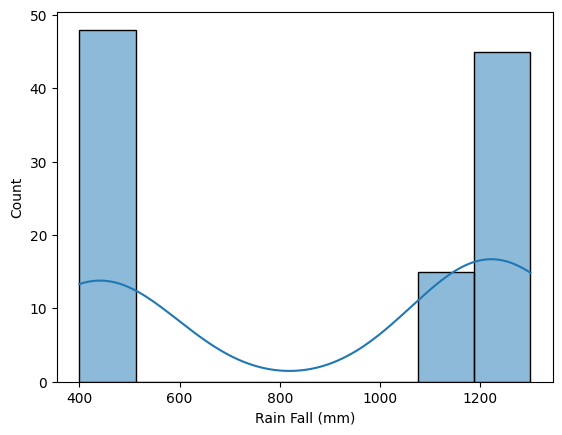

In [62]:
sns.histplot(x = "Rain Fall (mm)", data = df, kde = True)

<Axes: xlabel='Fertilizer', ylabel='Count'>

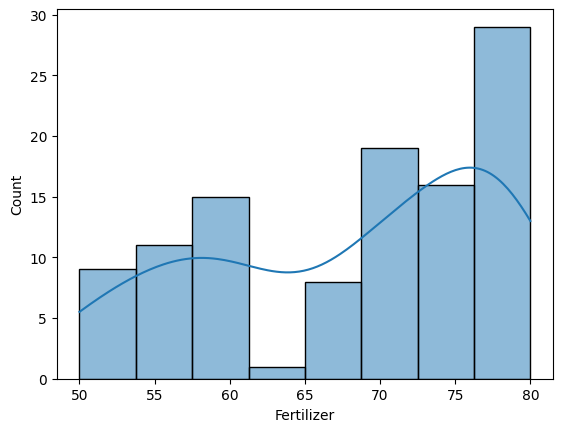

In [63]:
sns.histplot(x = "Fertilizer", data = df, kde = True)

<Axes: xlabel='Temperatue', ylabel='Count'>

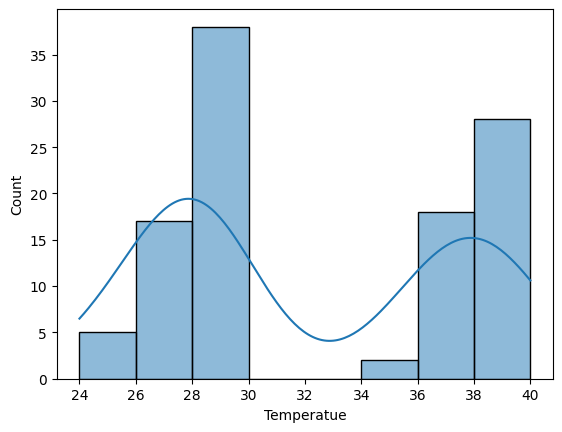

In [64]:
sns.histplot(x="Temperatue", data = df, kde = True)

<Axes: xlabel='Potassium (K)', ylabel='Count'>

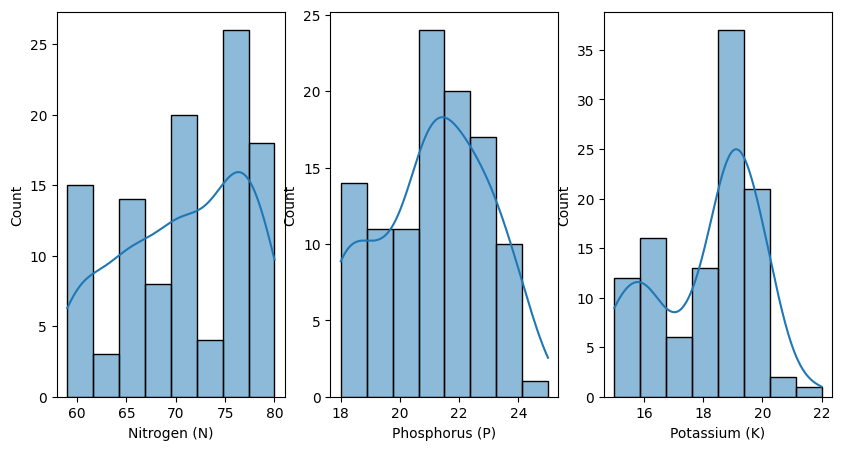

In [65]:
fig, ax = plt.subplots(1,3,figsize=(10, 5))
sns.histplot(x = "Nitrogen (N)", data = df, kde = True, ax = ax[0])
sns.histplot(x = "Phosphorus (P)", data = df, kde = True, ax = ax[1])
sns.histplot(x = "Potassium (K)", data = df, kde = True, ax = ax[2])

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

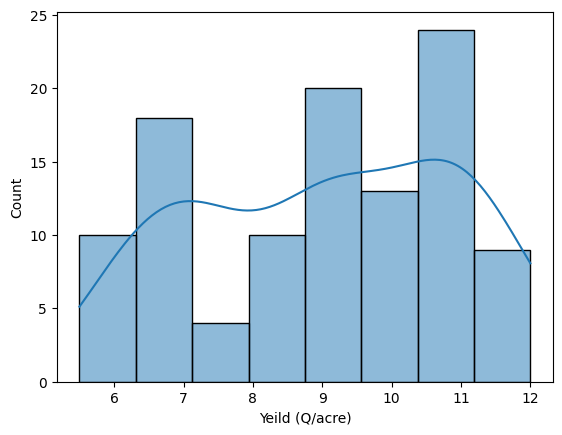

In [66]:
sns.histplot(x = "Yeild (Q/acre)", data = df, kde = True)

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

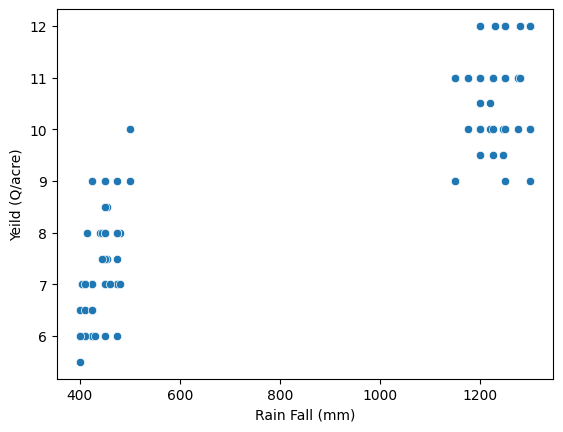

In [67]:
sns.scatterplot(x = 'Rain Fall (mm)', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Fertilizer', ylabel='Yeild (Q/acre)'>

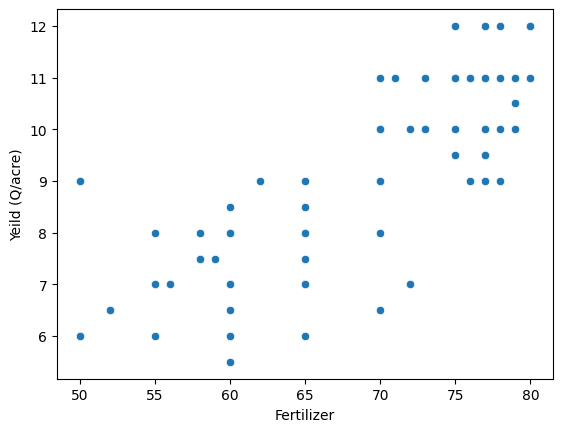

In [68]:
sns.scatterplot(x = 'Fertilizer', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Temperatue', ylabel='Yeild (Q/acre)'>

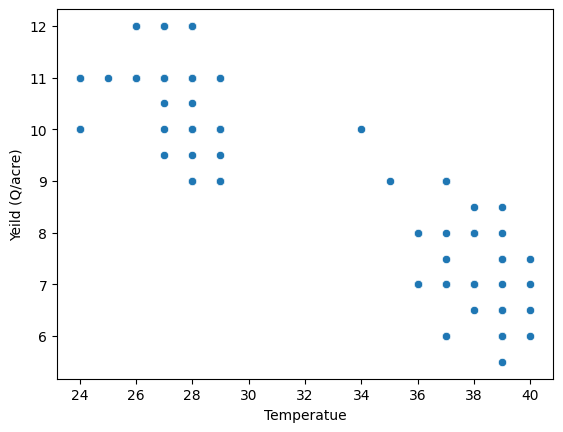

In [69]:
sns.scatterplot(x = 'Temperatue', y = 'Yeild (Q/acre)', data = df)

<Axes: xlabel='Potassium (K)', ylabel='Yeild (Q/acre)'>

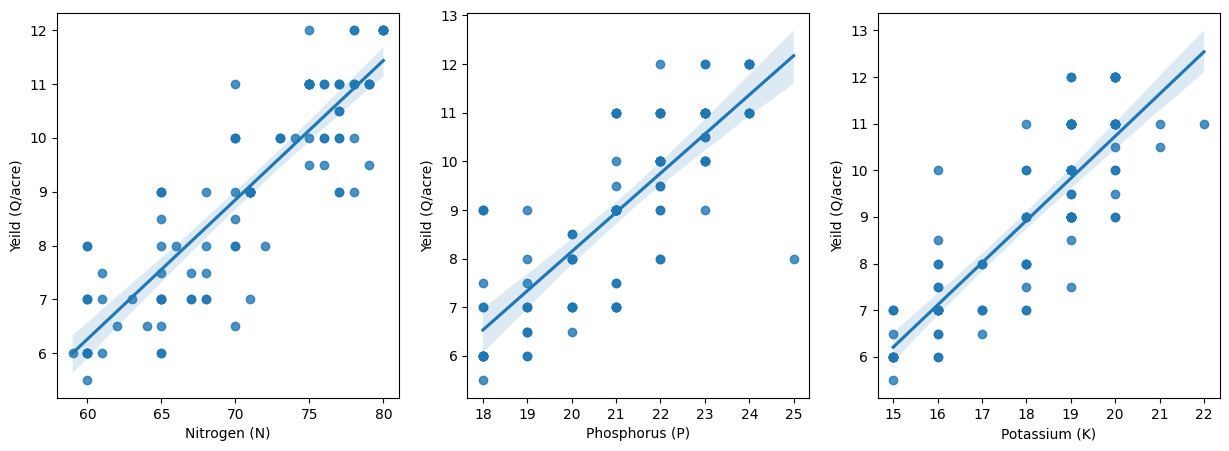

In [70]:
fig, ax = plt.subplots(1,3,figsize=(15, 5))
sns.regplot(x = 'Nitrogen (N)', y = 'Yeild (Q/acre)', data = df, ax = ax[0])
sns.regplot(x = 'Phosphorus (P)', y = 'Yeild (Q/acre)', data = df, ax = ax[1])
sns.regplot(x = 'Potassium (K)', y = 'Yeild (Q/acre)', data = df, ax = ax[2])

<Axes: >

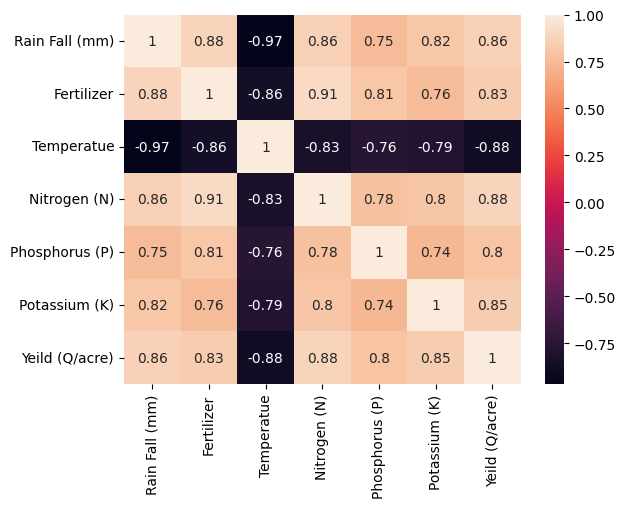

In [71]:
sns.heatmap(df.corr(), annot = True)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Yeild (Q/acre)', axis = 1), df['Yeild (Q/acre)'], test_size = 0.2, random_state = 42)

# **DECISION TREE REGRESSOR**

In [73]:
from sklearn.tree import DecisionTreeRegressor

#Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [74]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 0}


In [75]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 8, random_state = 0)

#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.9279431916668135


# **RANDOM FOREST REGRESSOR**

In [76]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest Regressor object
rfr = RandomForestRegressor()

In [77]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "n_estimators": [100,200,300],
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(rfr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100, 'random_state': 42}


In [78]:
#Random Forest Regressor with best parameters
rfr = RandomForestRegressor(max_depth = 4, min_samples_leaf = 2, min_samples_split = 6, n_estimators = 100, random_state = 42)

#fitting the model
rfr.fit(X_train, y_train)

#training score
print(rfr.score(X_train, y_train))

#prediction
r_pred = rfr.predict(X_test)

0.9355014219068669


<ipython-input-79-84cbca67ae08>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
<ipython-input-79-84cbca67ae08>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d_pred, ax = ax[0])
<ipython-input-79-84cbca67ae08>:8: UserWarning: 

`distpl

<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yeild (Q/acre)', ylabel='Density'>

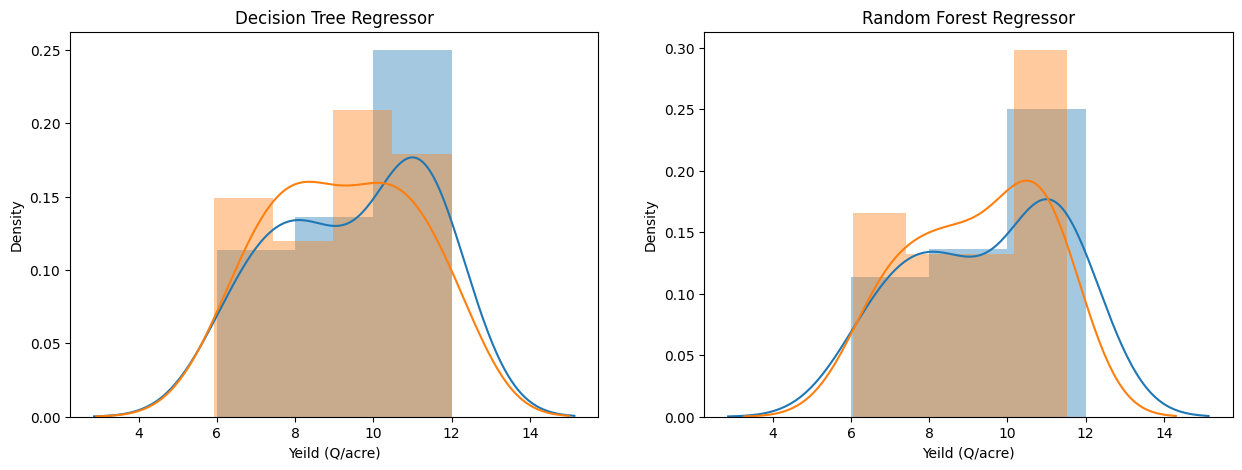

In [79]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.distplot(y_test, ax = ax[0]).set_title('Decision Tree Regressor')
sns.distplot(d_pred, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(r_pred, ax = ax[1])


In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Decision Tree Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("R2 Score: ", r2_score(y_test, d_pred))
print("\n")
print("Random Forest Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("R2 Score: ", r2_score(y_test, r_pred))

Decision Tree Regressor
Mean Squared Error:  0.8250555099243105
Mean Absolute Error:  0.6832293523469994
R2 Score:  0.7709296619513172


Random Forest Regressor
Mean Squared Error:  0.7108302219107439
Mean Absolute Error:  0.6836246853366845
R2 Score:  0.8026434375994264


Text(0.5, 1.0, 'Random Forest Regressor')

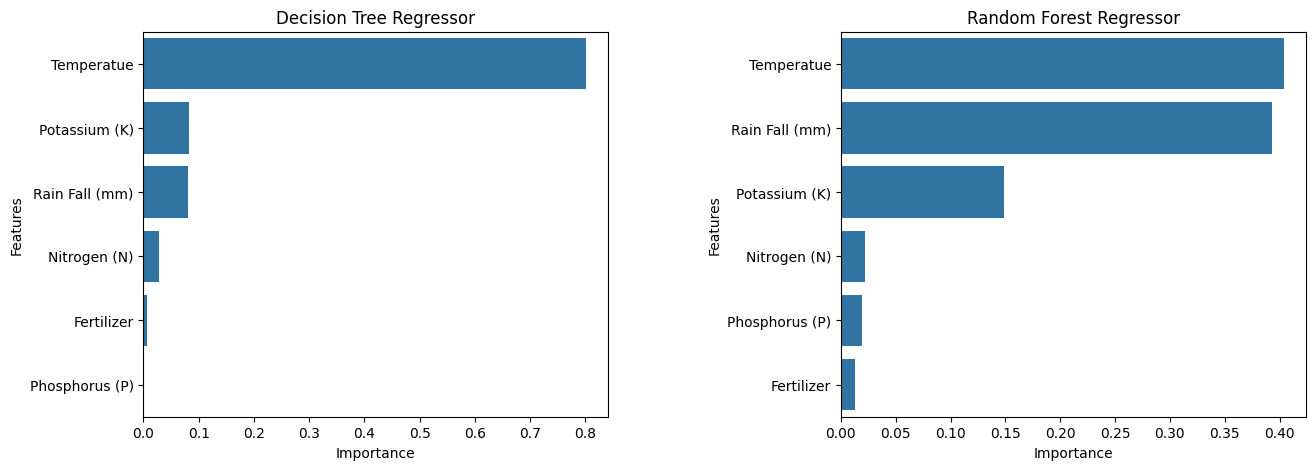

In [81]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

#Decision Tree Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':dtr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[0]).set_title('Decision Tree Regressor')

#Random Forest Regressor
feature_df = pd.DataFrame({'Features':X_train.columns, 'Importance':rfr.feature_importances_})
feature_df.sort_values(by='Importance', ascending=False, inplace=True)
sns.barplot(x = 'Importance', y = 'Features', data = feature_df, ax = ax[1]).set_title('Random Forest Regressor')

# **GRADIENT BOOSTING REGRESSOR**

In [82]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

# Fit the regressor on the training data
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [83]:
predict_gbr=gbr.predict(X_test)

In [84]:
print(gbr.score(X_train, y_train))

0.9887520424200408


In [85]:
print("Gradient Boosting Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, predict_gbr))
print("Mean Absolute Error: ", mean_absolute_error(y_test, predict_gbr))
print("R2 Score: ", r2_score(y_test, predict_gbr))

Gradient Boosting Regressor
Mean Squared Error:  0.4235531863455696
Mean Absolute Error:  0.4931266835201844
R2 Score:  0.8824037044650763


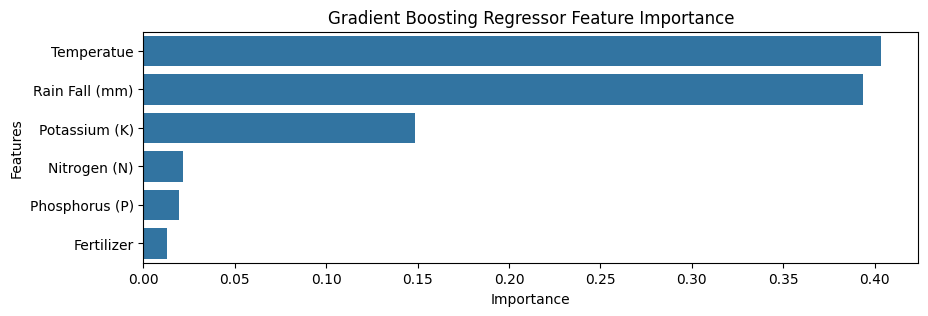

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))  # Create a new figure with the specified size

# Plot the feature importance using seaborn
sns.barplot(x='Importance', y='Features', data=feature_df)
plt.title('Gradient Boosting Regressor Feature Importance')  # Add a title to the plot
plt.show()  # Show the plot


In [87]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}


In [88]:
# Perform GridSearchCV
grid_search = GridSearchCV(gbr, param_grid, cv=5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [89]:
#best parameters
print(grid_search.best_params_)

{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [90]:
#Random Forest Regressor with best parameters
gbr_1 = GradientBoostingRegressor(max_depth = 3,n_estimators = 200, learning_rate= 0.01)

#fitting the model
gbr_1.fit(X_train, y_train)

#training score
print(gbr_1.score(X_train, y_train))

#prediction
gbr_pred = gbr_1.predict(X_test)

0.9225882913643781


In [91]:
print("Gradient Boosting Regressor")
print("Mean Squared Error: ", mean_squared_error(y_test, gbr_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, gbr_pred))
print("R2 Score: ", r2_score(y_test, gbr_pred))

Gradient Boosting Regressor
Mean Squared Error:  0.5461311926686585
Mean Absolute Error:  0.6591389581325495
R2 Score:  0.848370860604256


#SVR

In [138]:
from sklearn.svm import SVR

In [136]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [139]:
# Define the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

# Train the model
svr.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [140]:
# Predictions
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 0.47572783380527406
Mean Absolute Error: 0.48112889921975693
R2 Score: 0.8679178135311902


In [141]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SVR model
svr = SVR()

In [142]:
# Define the grid of hyperparameters to search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01, 0.001]
}

In [143]:
# Perform Grid Search CV
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


In [144]:
# Predictions
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 0.48574594238030533
Mean Absolute Error: 0.5916503036059673
R2 Score: 0.8651363624769438


CONCLUSION: GRADIENT BOOSTING REGRESSION performs best to predict crop yield without fine tuning.